In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.ticker
from astropy.io import ascii

In [46]:
#print('#############################  DATA CARD ##############################','\n')
with open('all', 'r') as f:
    read_data = f.read()
    #print(read_data) 
    datacard=ascii.read(read_data,format='fixed_width_no_header', delimiter=' '
                        ,col_starts=(0, 8, 39)
#                         ,col_ends=(7, 38, 150)
                       )
f.closed
#print('#######################################################################','\n')

nshower=int(datacard[2][1].split()[0])
print('Num_showers:',nshower)
E_prim=float(datacard[5][1].split()[1])
print('E_primary (GeV):',E_prim)
prim_part=int(datacard[3][1].split()[0])
if prim_part ==1:
    print('ID_prim_particle: gamma')
    prim_part='gamma'
if prim_part ==14:
    prim_part='proton'
seed1=int(datacard[8][1].split()[0])
seed2=int(datacard[9][1].split()[0])
print('Seeds:',seed1,',',seed2)
theta_p=float(datacard[6][1].split()[0])
print('Theta prim. part. incidence:',theta_p, 'deg')
phi_p=float(datacard[7][1].split()[0])
print('Phi prim. part. incidence:',phi_p, 'deg')
obs_level=float(datacard[10][1].split()[0])
obs_level=obs_level*1e-2 #in meters
print('Obs level (masl):',obs_level)
atm_mod=int(datacard[18][1].split()[0])
print('Atmosp model:',atm_mod)
cersize=float(datacard[23][1].split()[0])
print('Cerenk_bunch_size:',cersize)
fluorsize=float(datacard[24][1].split()[0])
print('Fluor_bunch_size:',fluorsize)
x_area=float(datacard[27][1].split()[4])
y_area=float(datacard[27][1].split()[5])
print('Detector size:',x_area)
print('---------------------')
maxlen  = 1e-2 * x_area / 2

Num_showers: 1
E_primary (GeV): 100.0
ID_prim_particle: gamma
Seeds: 11 , 4
Theta prim. part. incidence: 30.0 deg
Phi prim. part. incidence: 180.0 deg
Obs level (masl): 2200.0
Atmosp model: 1
Cerenk_bunch_size: 15.0
Fluor_bunch_size: 3.0
Detector size: 300000.0
---------------------


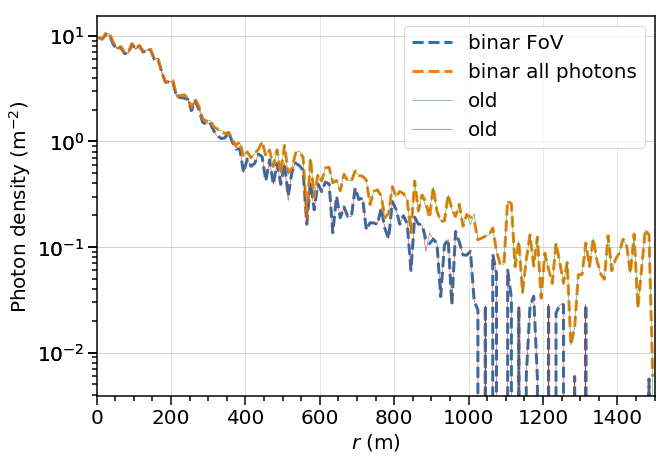

In [78]:
r1,cerenk1=np.loadtxt('5sh_100GeV_30deg_offaxis_hist_x_fov.dat',unpack=True,comments='#')
r3,cerenk3=np.loadtxt('5sh_100GeV_30deg_offaxis_hist_x_fov_old.dat',unpack=True,comments='#')
r2,cerenk2=np.loadtxt('5sh_100GeV_30deg_offaxis_hist_x_all_old.dat',unpack=True,comments='#')
r4,cerenk4=np.loadtxt('5sh_100GeV_30deg_offaxis_hist_x_all_phots.dat',unpack=True,comments='#')

# ----- Figures format -----

# plt.rc('text', usetex=True)
plt.rc('font'
#        , family='serif'
       , size=20
      )
plt.rc("axes", linewidth=1.5)
plt.rc("lines", markeredgewidth=1.5)
# --------------------------


# name='10sh_1000GeV_0deg_offaxis_hist_r'

if x_area != y_area:
    type_of_hist='x'
else:
    type_of_hist='r'

fig, ax=plt.subplots(figsize=(10,7))

# =======================
ax.plot(r1,cerenk1,label=r'binar FoV',linewidth=3,linestyle='--')
ax.plot(r4,cerenk4,label=r'binar all photons',linewidth=3,linestyle='--')
# -----------------------
ax.plot(r2,cerenk2,label=r'old',linewidth=.5)
ax.plot(r3,cerenk3,label=r'old',linewidth=.5)
# =======================



# ----- Axis format -----
ax.set_yscale("log")

locmaj = matplotlib.ticker.LogLocator(base=10.0
                                      ,subs=(0.1,1.0, )
                                     )
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0
                                      ,subs=(0.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9, )
                                     )
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.minorticks_on()
ax.tick_params('both', length=9, width=1.5, which='major')
ax.tick_params('both', length=5, width=1.5, which='minor')

ax.set_xlim(0.,maxlen)

# --------------------------

plt.grid(alpha=0.4)
plt.xlabel(r'$%s$ (m)'%type_of_hist)
plt.ylabel(r'Photon density (m$^{-2}$)')

#plt.title(r'$N_{\textrm{sh}}=$ %i, $E_{\gamma}=$ 10 TeV, $\theta = 0 ^{\circ}$, $\Delta \theta = 5 ^{\circ}$'%(nshower)
#,fontsize=28)
plt.legend(loc=1,fontsize = 20)
#plt.tight_layout()
# plt.savefig('%s.pdf'%name
#            ,bbox_inches='tight')
plt.show()